In [1]:
import numpy as np
import os
from PIL import Image
import cv2 as cv
from keras.preprocessing import image
import matplotlib.pyplot as plt
import math

Using TensorFlow backend.


In [2]:
def read_directory(directory_name):    
    for filename in os.listdir(directory_name):
        img = Image.open(directory_name + "/" + filename)
        arr = image.img_to_array(img)
        array_of_img.append(arr)

In [3]:
def find_plus_val(img_array):
    plus_val = 255
    for arr in img_array:
        for val in arr:
            num = val - 0
            if num < plus_val and num != 0:
                plus_val = num
    return plus_val

In [4]:
def find_minus_val(img_array):
    minus_val = 255
    for arr in img_array:
        for val in arr:
            num = 255 - val
            if num < minus_val and num != 0:
                minus_val = num
    return minus_val

In [5]:
def plus_operate(img_array, plus_v):
    new_arr = []
    for arr in img_array:
        for val in arr:
            if val != 255 and val != 0:
                val = val - plus_v
            new_arr.append(val)
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(9, 7, 1)
    return new_arr
    #new_array_of_plus_img.append(new_arr)

In [6]:
def minus_operate(img_array, minus_v):
    new_arr = []
    for arr in img_array:
        for val in arr:
            if val != 255:
                val = val + minus_v
                if val == 255:
                    val = val - 6
            new_arr.append(val)
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(9, 7, 1)
    return new_arr
    #new_array_of_minus_img.append(new_arr)

In [7]:
def find_mean_and_operate(img_array, operation):
    #find pressure value that's not 255 and save
    pressure_val = []
    for arr in img_array:
        for val in arr:
            if val != 255:
                pressure_val.append(255 - val)
                
    #calculate the mean and rounding
    Mean = np.mean(pressure_val)
    if math.isnan(Mean) == True:
        Mean = 0
    else:    
        Mean = math.ceil(Mean)

    #substract the mean
    minus_mean_arr = []
    for arr in img_array:
        for val in arr:
            if val == 255:
                num = val
            elif val != 255:
                num = val + Mean
                #if num > 255:
                    #num = num255
            minus_mean_arr.append(num)
    
    #decide the operate method
    if operation == 'Plus':
        plus_val = find_plus_val(minus_mean_arr)
        print(plus_val)
        new_arr = plus_operate(minus_mean_arr, plus_val)
    elif operation == 'Minus':
        minus_val = find_minus_val(minus_mean_arr)
        print(minus_val)
        new_arr = minus_operate(minus_mean_arr, minus_val)
    
    #finally add the mean back
    final_arr = []
    for arr in new_arr:
        for val in arr:
            if val == 255:
                num = val
            elif val == 0:
                num = val
            elif val != 255:
                num = val - Mean
                if num < 0:
                    num = num0
            final_arr.append(num)
    final_arr = np.array(final_arr)
    final_arr = final_arr.reshape(9, 7, 1)
    
    return final_arr

In [8]:
array_of_img = []

new_mean_plus_img = []

new_mean_minus_img = []

all_new_mean_plus_minus_img = []

print(array_of_img, new_mean_plus_img, new_mean_minus_img, all_new_mean_plus_minus_img, sep = '/')

[]/[]/[]/[]


In [9]:
org_dir = '../7x9/4/'
save_dir = '../Varieties/Mean_Plus_Minus/4/'
pose = 'sit'
col = 7
row = 9

print ("0:lie, 1:under, 2:right, 3:left, 4:sit, 5:unknown")

0:lie, 1:under, 2:right, 3:left, 4:sit, 5:unknown


In [10]:
#print(os.listdir(org_dir))
#print(os.listdir(org_dir)[101])
print(len(os.listdir(org_dir)))

6387


In [11]:
read_directory(org_dir)

In [12]:
num255 = 0
num0 = 0
for arr in array_of_img[0]:
    for val in arr:
        if val == 255:
            num255 = val - 6
            num0 = 255 - val
print(num255, num0)

[249.] [0.]


In [13]:
for arr in array_of_img:
    new_mean_minus_img_arr = find_mean_and_operate(arr, 'Minus')
    new_mean_minus_img.append(new_mean_minus_img_arr)

-105.0
-95.0
-145.0
-101.0
-130.0
-130.0
-133.0
-140.0
-132.0
-55.0
-162.0
-147.0
-116.0
-126.0
-115.0
-123.0
-126.0
-123.0
-112.0
-123.0
-124.0
-125.0
-163.0
-129.0
-140.0
-115.0
-128.0
-121.0
-121.0
-122.0
-132.0
-130.0
-127.0
-113.0
-144.0
-138.0
-119.0
-124.0
-120.0
-124.0
-131.0
-124.0
-125.0
-124.0
-119.0
-152.0
-150.0
-118.0
-135.0
-129.0
-130.0
-128.0
-128.0
-127.0
-127.0
-128.0
-118.0
-152.0
-116.0
-124.0
-123.0
-113.0
-143.0
-111.0
-132.0
-159.0
-160.0
-158.0
-157.0
-115.0
-168.0
-156.0
-151.0
-152.0
-159.0
-143.0
-35.0
-39.0
-185.0
-184.0
-115.0
-7.0
-167.0
-6.0
-4.0
-4.0
-4.0
-210.0
-210.0
-9.0
-123.0
-119.0
-125.0
-121.0
-153.0
-131.0
-114.0
-115.0
-117.0
-125.0
-111.0
-134.0
-109.0
-119.0
-144.0
-140.0
-172.0
-116.0
-146.0
-148.0
-149.0
-144.0
-140.0
-141.0
-110.0
-128.0
-148.0
-142.0
-138.0
-168.0
-134.0
-131.0
-131.0
-133.0
-132.0
-97.0
-146.0
-145.0
-144.0
-146.0
-148.0
-54.0
-147.0
-148.0
-126.0
-126.0
-99.0
-143.0
-151.0
-137.0
-149.0
-143.0
-149.0
-149.0
-166.0
-148

In [44]:
for arr in array_of_img:
    new_mean_plus_img_arr = find_mean_and_operate(arr, 'Plus')
    new_mean_plus_img.append(new_mean_plus_img_arr)
    
    new_mean_minus_img_arr = find_mean_and_operate(arr, 'Minus')
    new_mean_minus_img.append(new_mean_minus_img_arr)
    
    all_new_mean_plus_minus_img.append(new_mean_plus_img_arr)
    all_new_mean_plus_minus_img.append(new_mean_minus_img_arr)

print(len(new_mean_plus_img), len(new_mean_minus_img), len(all_new_mean_plus_minus_img))

6387 6387 12774


In [14]:
i = 0
for img in all_new_mean_plus_minus_img:
    cv.imwrite(save_dir + 'mean_plus_minus_' + pose + str(i) +'.png', img)
    i += 1
print('Done!')

Done!


In [45]:
print('org:')
print(array_of_img[101].reshape(9, 7))

print('mean plus:')
print(new_mean_plus_img[101].reshape(9, 7))

print('mean minus:')
print(new_mean_minus_img[101].reshape(9, 7))


org:
[[255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]
 [255. 255.  73.   5.   5. 210. 255.]
 [255. 255. 170.   4.   5. 255. 255.]
 [255. 255. 255. 255. 142. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]]
mean plus:
[[255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]
 [255. 255.   0.   0.   0.  27. 255.]
 [255. 255.   0.   0.   0. 255. 255.]
 [255. 255. 255. 255.   0. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]]
mean minus:
[[255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]
 [255. 255.   0.   0.   0.  70. 255.]
 [255. 255.  36.   0.   0. 255. 255.]
 [255. 255. 255. 255.   8. 255. 255.]
 [255. 255. 255. 255

In [46]:
org_img = image.array_to_img(array_of_img[101])
plus_img = image.array_to_img(new_mean_plus_img[101])
minus_img = image.array_to_img(new_mean_minus_img[101])

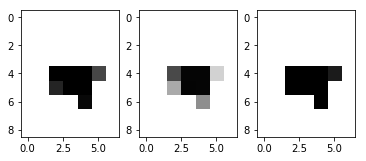

In [47]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(minus_img)
plt.subplot(1,3,2)
plt.imshow(org_img)
plt.subplot(1,3,3)
plt.imshow(plus_img)
plt.show()

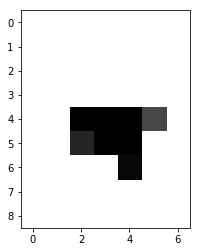

In [48]:
plt.imshow(minus_img)
plt.show()

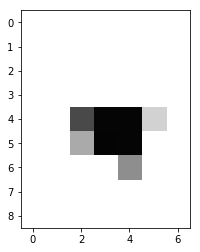

In [49]:
plt.imshow(org_img)
plt.show()

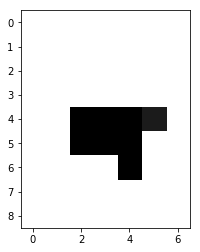

In [50]:
plt.imshow(plus_img)
plt.show()